# Dataset Generation

This script allows for fast generation of a dataset of cloud and shadow masks. The masks can then be mixed with any new image to generate a version with clouds and shadows (see an example of posterior mixing at the very bottom!)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import rasterio as rio
from pathlib import Path
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio

from src import *


# visualization
plt.rcParams["figure.figsize"] = (4,4)
def show(tensor,*args,**kwargs):    
    plt.imshow(tensor.squeeze(0).permute(1,2,0),*args,**kwargs)

GPU_IDX = 0
rgb_img=imageio.imread('imgs/rgb_example.png')[...,:3]/255
# to tensor (B,C,H,W)
rgb_img = torch.FloatTensor(rgb_img).permute(2,0,1).unsqueeze(0)
const_img=np.ones_like(rgb_img)*0.5

In [3]:
# dataset params
N=20 # image count
shape=(256,256) # image shape
data_dir=Path("./data/cloud_dataset")

## Group 1: Thick Clouds

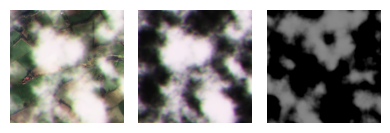

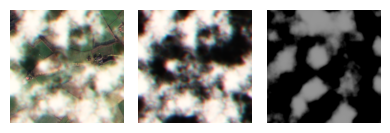

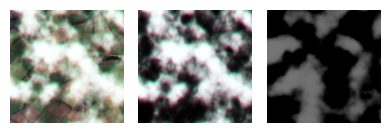

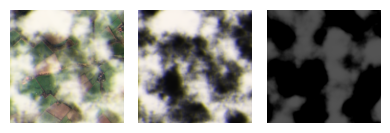

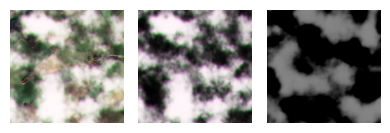

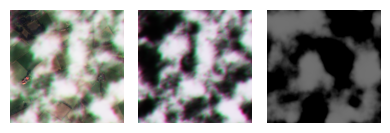

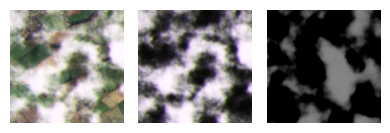

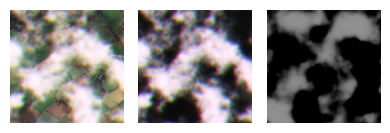

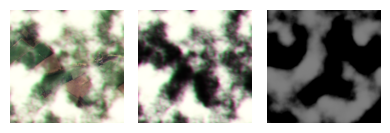

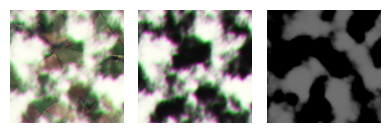

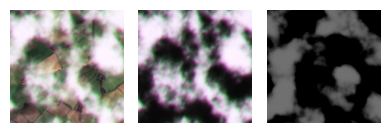

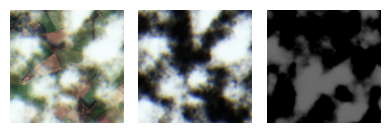

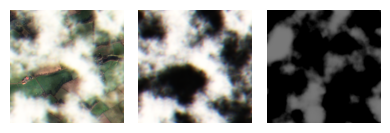

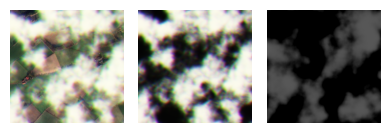

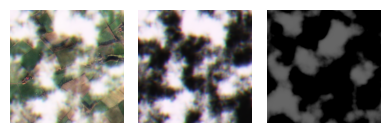

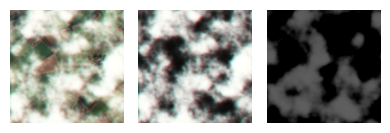

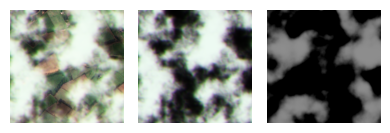

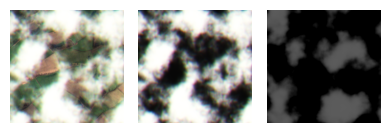

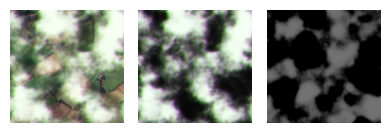

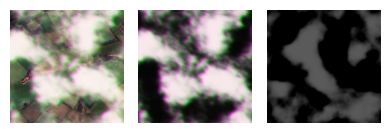

In [4]:
out_dir=(data_dir / "thick")
out_dir.mkdir(parents=True, exist_ok=True)

display=True

for idx in range(N):

    cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                            return_cloud=True
                                           )

    if display:
        plt.figure()
        plt.subplot(1,3,1)
        show(cl)
        plt.axis('off')
        plt.subplot(1,3,2)
        show(cmask)
        plt.axis('off')
        plt.subplot(1,3,3)
        show(smask)
        plt.axis('off')
        plt.tight_layout()
    
    # save images
    with open(out_dir / "cloud_{}.npy".format(idx), 'wb') as f:
        np.save(f,cmask)
    with open(out_dir / "shadow_{}.npy".format(idx), 'wb') as f:
        np.save(f,smask)

## Group 2: Local

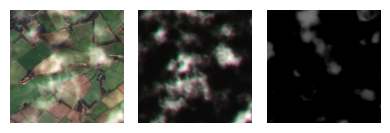

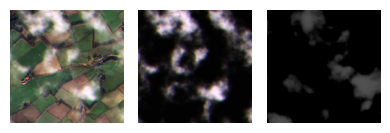

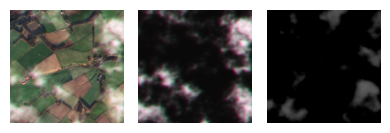

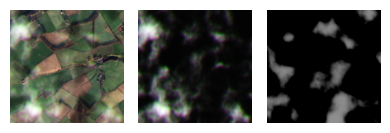

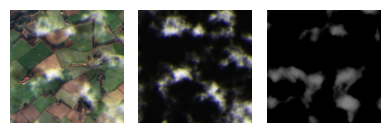

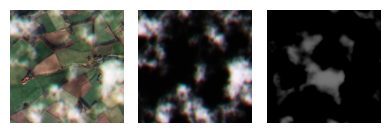

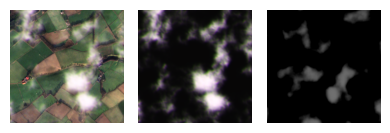

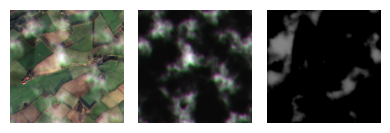

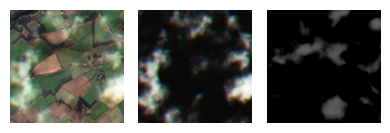

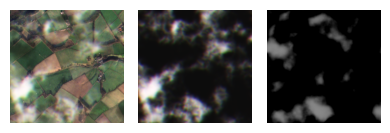

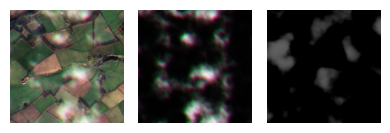

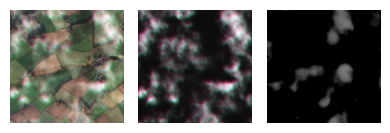

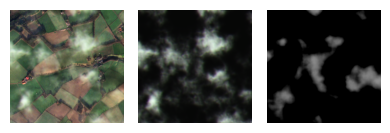

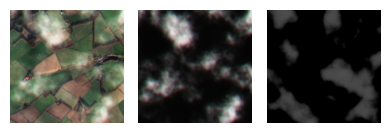

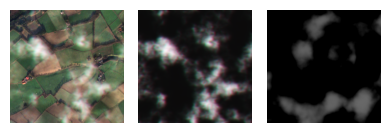

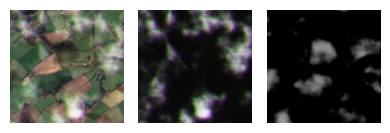

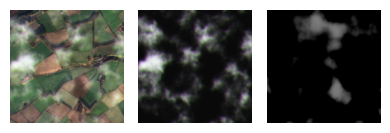

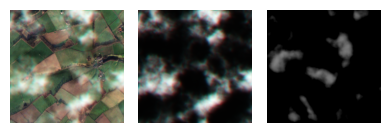

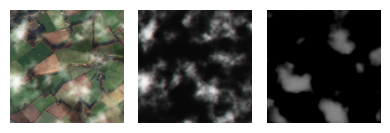

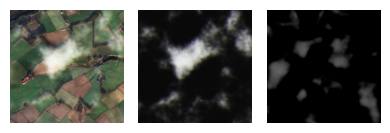

In [5]:
out_dir=(data_dir / "local")
out_dir.mkdir(parents=True, exist_ok=True)

display=True

for idx in range(N):

    cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                            locality_degree=3,
                                            return_cloud=True
                                           )

    if display:
        plt.figure()
        plt.subplot(1,3,1)
        show(cl)
        plt.axis('off')
        plt.subplot(1,3,2)
        show(cmask)
        plt.axis('off')
        plt.subplot(1,3,3)
        show(smask)
        plt.axis('off')
        plt.tight_layout()
    
    # save images
    with open(out_dir / "cloud_{}.npy".format(idx), 'wb') as f:
        np.save(f,cmask)
    with open(out_dir / "shadow_{}.npy".format(idx), 'wb') as f:
        np.save(f,smask)

## Group 3: Haze

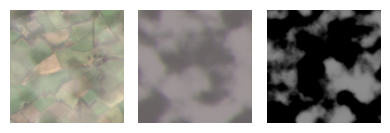

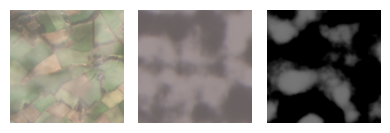

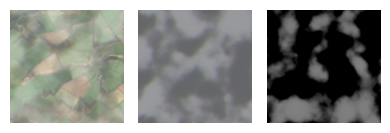

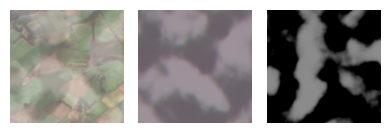

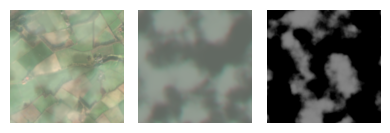

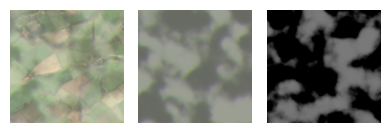

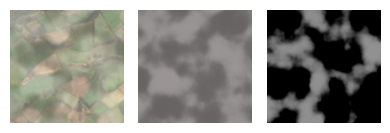

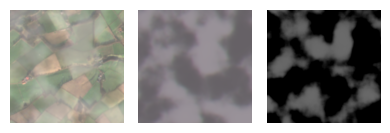

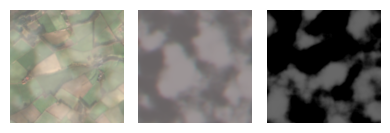

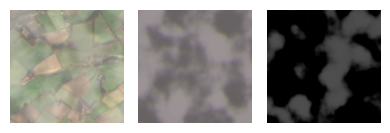

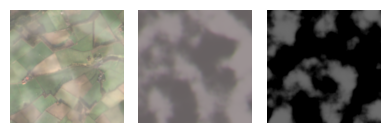

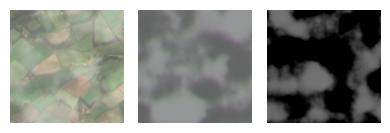

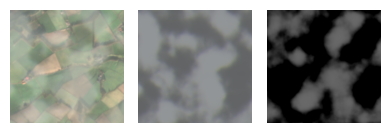

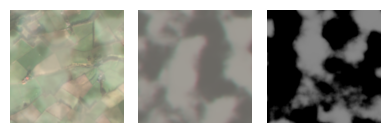

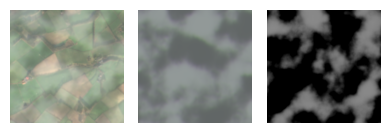

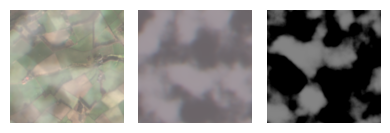

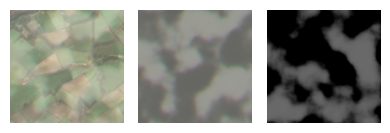

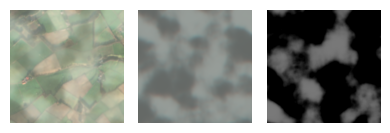

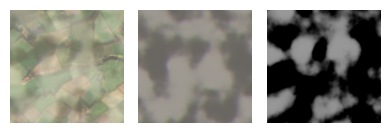

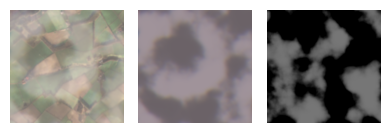

In [6]:
out_dir=(data_dir / "thin")
out_dir.mkdir(parents=True, exist_ok=True)

display=True

for idx in range(N):

    cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                            min_lvl=0.4,
                                            max_lvl=0.6,
                                            decay_factor=1.5,
                                            return_cloud=True
                                           )

    if display:
        plt.figure()
        plt.subplot(1,3,1)
        show(cl)
        plt.axis('off')
        plt.subplot(1,3,2)
        show(cmask)
        plt.axis('off')
        plt.subplot(1,3,3)
        show(smask)
        plt.axis('off')
        plt.tight_layout()
    
    # save images
    with open(out_dir / "cloud_{}.npy".format(idx), 'wb') as f:
        np.save(f,cmask)
    with open(out_dir / "shadow_{}.npy".format(idx), 'wb') as f:
        np.save(f,smask)

# Dataset Usage
If we have an clear image like the `rgb_image`, it can be mixed with any new cloud using the `mix()` function in `SatelliteCloudGenerator` (make sure you import the package).

In [7]:
# our new image
rgb_img = torch.from_numpy(imageio.imread('imgs/rgb_example.png')[...,:3]/255)
rgb_img = rgb_img.permute(2,0,1).unsqueeze(0)

# a cloud from our dataset
with open('./data/cloud_dataset/local/cloud_1.npy', 'rb') as f:
    cmask = torch.from_numpy(np.load(f))
    
# a shadow from our dataset
with open('./data/cloud_dataset/thick/shadow_1.npy', 'rb') as f:
    smask = torch.from_numpy(np.load(f))
    
# apply mixing
cloudy_img = mix(rgb_img, cmask)

Text(0.5, 1.0, 'Result')

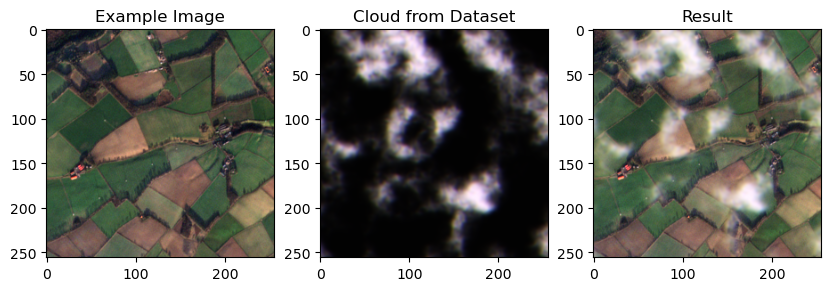

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Example Image')
plt.subplot(1,3,2)
show(cmask)
plt.title('Cloud from Dataset')
plt.subplot(1,3,3)
show(cloudy_img)
plt.title('Result')

In [9]:
cloudy_shadowy_img = mix(rgb_img, cmask, shadow=smask)

Text(0.5, 1.0, 'Result')

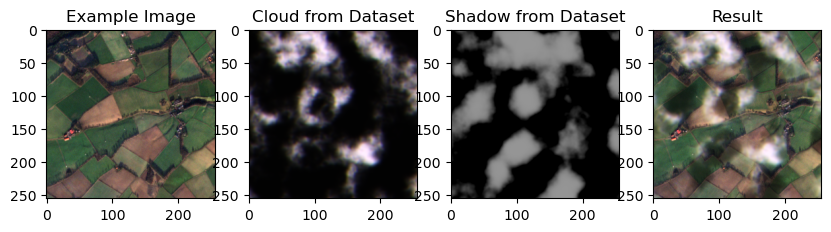

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(1,4,1)
show(rgb_img)
plt.title('Example Image')
plt.subplot(1,4,2)
show(cmask)
plt.title('Cloud from Dataset')
plt.subplot(1,4,3)
show(smask)
plt.title('Shadow from Dataset')
plt.subplot(1,4,4)
show(cloudy_shadowy_img)
plt.title('Result')